# Import Libraries

## Load External Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression

## Load Internal Classes and Functions

In [2]:
from library.LinearRegressionCustomModel1 import LinearRegressionCustomModel1
from library.PolynomialDegree5RegressionCustomModel import PolynomialDegree5RegressionCustomModel
from library.QuadraticRegressionCustomModel import QuadraticRegressionCustomModel
from library.utils import (
    prepare_data,
    computeOptimalParameters,
    computeOptimalTrainSize,
)

# Analysis of the "Advertising.csv" dataset 

## Load the data

In [3]:
# Load data from csv file
auto_df = pd.read_csv("./data/auto.csv", index_col=0)
auto_df = auto_df.reset_index() # Reset index
auto_df["horsepower"] = pd.to_numeric(auto_df["horsepower"], errors="coerce") # Converts the colomn horsepower to numeric
auto_df = auto_df.dropna() # Drop rows with NaN values
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


##  Display shape and summary of the dataset

In [4]:
# Shape of the data
auto_df.shape

(392, 9)

In [5]:
# Statistical description of the data
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Pairplot of the dataset to visualize the relationship between the features and the sales

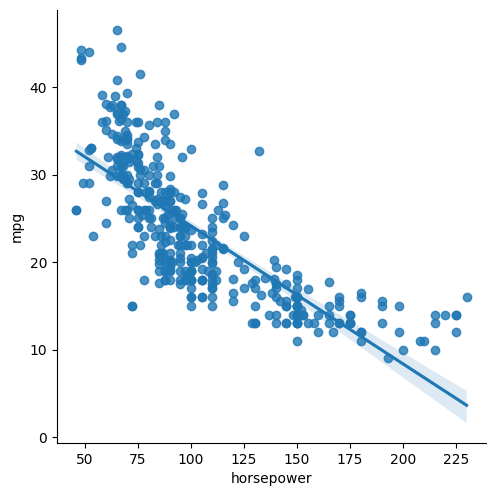

In [6]:
# Plot raw data
sns.pairplot(
    auto_df,
    x_vars=["horsepower"],
    y_vars=["mpg"],
    height=5,
    aspect=1,
    kind="reg",
)

## Compute the correlation matrix

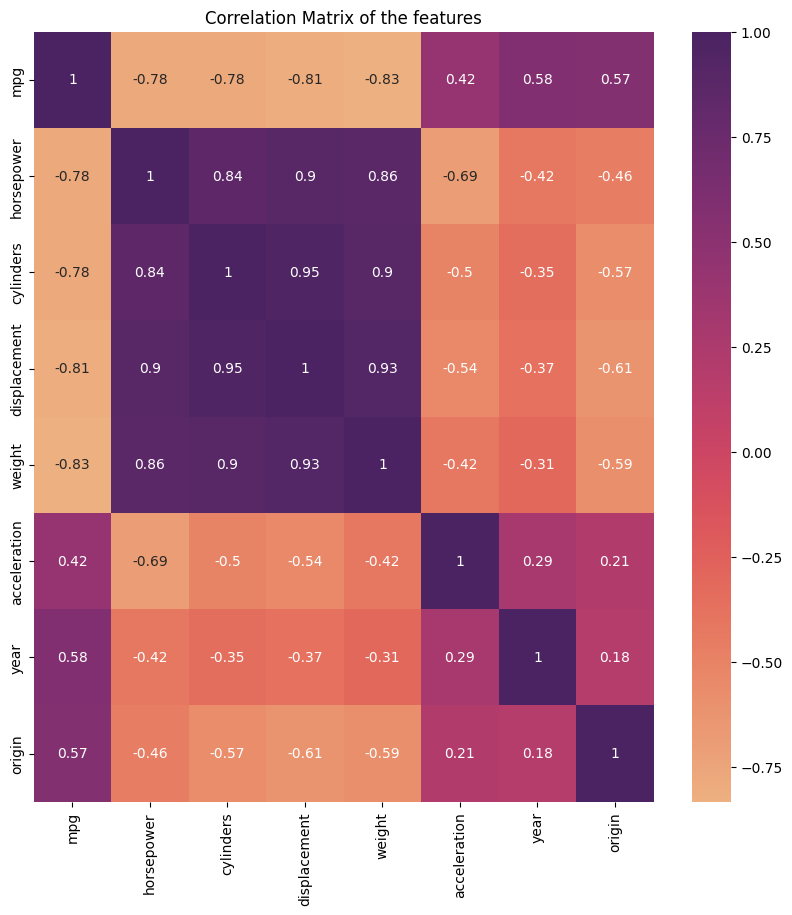

In [7]:
# Compute correlation matrix and plot it
correlation_matrix = auto_df[
    [
        "mpg",
        "horsepower",
        "cylinders",
        "displacement",
        "weight",
        "acceleration",
        "year",
        "origin",
    ]
].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap="flare", annot=True)
plt.title("Correlation Matrix of the features")
plt.show()

# Test of the multivariate linear regression class on the "Auto.csv" dataset

### Find the optimal hyperparameters for the multivariate linear regression class

In [8]:
# Optimal Ratio of Training and Test Data 
r = 2 # Amount of features
optimalTrainSize = computeOptimalTrainSize(r)
print("Optimal train size:", optimalTrainSize)

Optimal train size: 0.5857864376269049


### Prepare the data

In [9]:
# Prepare data
x = auto_df["horsepower"].values.reshape(-1, 1) # Load features
y = auto_df['mpg'].values # Load target

x_train, x_test, y_train, y_test = prepare_data(x, y, optimalTrainSize)

### Compute the optimal parameters for the models

In [10]:
# Compute optimal hyperparameters for model 1
(
    iterations_nb_model_1,
    learning_rate_model_1,
    results_model_1,
) = computeOptimalParameters(x_train, x_test, y_train, y_test, 1)


# Print results
print("Optimal hyperparameters:")
print("Iterations number:", iterations_nb_model_1)
print("Learning rate:", learning_rate_model_1)

Optimal hyperparameters:
Iterations number: 20000
Learning rate: 0.0001


### Compute the Linear Regression model with the optimal parameters

In [11]:
print("Computing Linear Regression with optimal hyperparameters\n")

# Initialise model
model = LinearRegressionCustomModel1(learning_rate_model_1, iterations_nb_model_1)

# Fit model to training data
theta, cost = model.fit(x_train, y_train)
print("Linear Regression Coefficients:", theta)
print("Cost:", cost)
print("")

# Compute predictions
y_pred_1 = model.predict(x_test)

# Evaluate model
rSquare, meanAbErr, meanSqErr, rootMeanSqErr = model.metrics(x_test, y_test)
print("Metrics:")
print("R squared:", rSquare)
print("Mean absolute error:", meanAbErr)
print("Mean squared error:", meanSqErr)
print("Root mean squared error:", rootMeanSqErr)

Computing Linear Regression with optimal hyperparameters

Linear Regression Coefficients: [23.25451845 -6.03844843]
Cost: 25.25748093508731

Metrics:
R squared: 0.6119240089933218
Mean absolute error: 3.698404271012172
Mean squared error: 22.342570538206978
Root mean squared error: 4.726792838511857


### Plot the predicted values against the actual values

Text(0.5, 1.0, 'Linear Regression using custom Linear Regression Model 1')

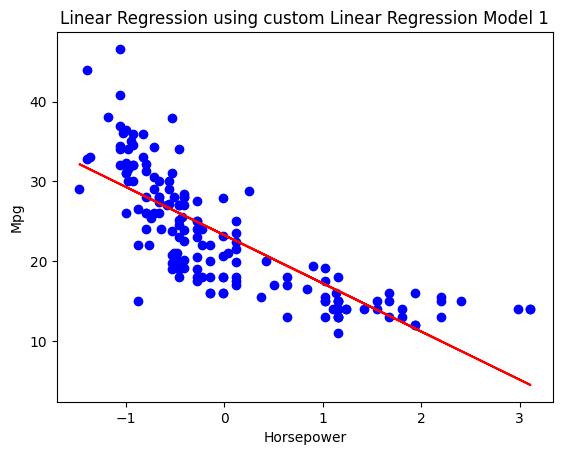

In [12]:
# Plot results
plt.figure()
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_test, y_pred_1, color="red")
plt.xlabel("Horsepower")   
plt.ylabel("Mpg")
plt.title("Linear Regression using custom Linear Regression Model 1")

### Verification using the sklearn library

In [13]:
print("Computing Linear Regression with Scikit-Learn...\n")
# Training the model
model = LinearRegression()
model.fit(x_train, y_train)

# Testing the model
y_pred_verif_1 = model.predict(x_test)

# Evaluating the model
print('R squared:', metrics.r2_score(y_test, y_pred_verif_1))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_verif_1))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred_verif_1))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_verif_1)))


Computing Linear Regression with Scikit-Learn...

R squared: 0.6057998477413031
Mean Absolute Error: 3.7379097869993747
Mean Square Error: 22.695154846258713
Root Mean Square Error: 4.763943203508908


Text(0.5, 1.0, 'Linear Regression using Scikit-Learn')

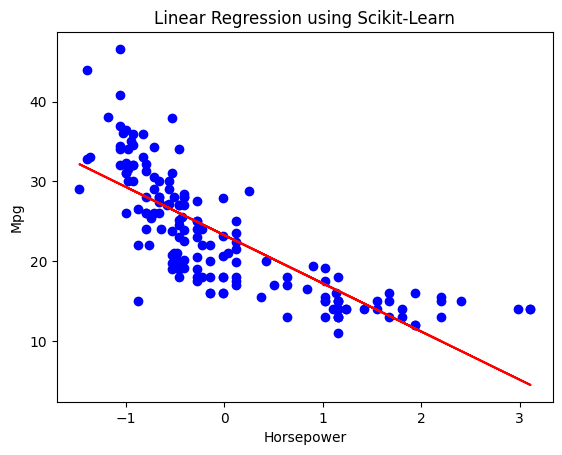

In [14]:
# Plot results
plt.figure()
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_test, y_pred_1, color="red")
plt.xlabel("Horsepower")
plt.ylabel("Mpg")
plt.title("Linear Regression using Scikit-Learn")

# Test of the Quadratic Regression class on the "Auto.csv" dataset

### Compute the optimal parameters for the Quadratic Regression model

In [15]:
# Compute optimal hyperparameters for model 1
(
    iterations_nb_quadratic,
    learning_rate_quadratic,
    results_model_quadratic,
) = computeOptimalParameters(x_train, x_test, y_train, y_test, "quadratic")


# Print results
print("Optimal hyperparameters:")
print("Iterations number:", iterations_nb_quadratic)
print("Learning rate:", learning_rate_quadratic)

Optimal hyperparameters:
Iterations number: 20000
Learning rate: 0.0001


### Compute the Quadratic Regression model with the optimal parameters

In [16]:
# Initialise the model
quadratic_model = QuadraticRegressionCustomModel(learning_rate_quadratic, iterations_nb_quadratic)

# Fit the model
quadratic_model.fit(x_train, y_train)

# Make predictions
y_pred_quadratic = quadratic_model.predict(x_test)

# Compute metrics
rSquare, meanAbErr, meanSqErr, rootMeanSqErr = quadratic_model.metrics(x_test, y_test)
print("Metrics:")
print("R squared:", rSquare)
print("Mean absolute error:", meanAbErr)
print("Mean squared error:", meanSqErr)
print("Root mean squared error:", rootMeanSqErr)


Metrics:
R squared: 0.722374249269287
Mean absolute error: 3.017987331456367
Mean squared error: 15.983655424890435
Root mean squared error: 3.997956406076789


### Plot the predicted values against the actual values

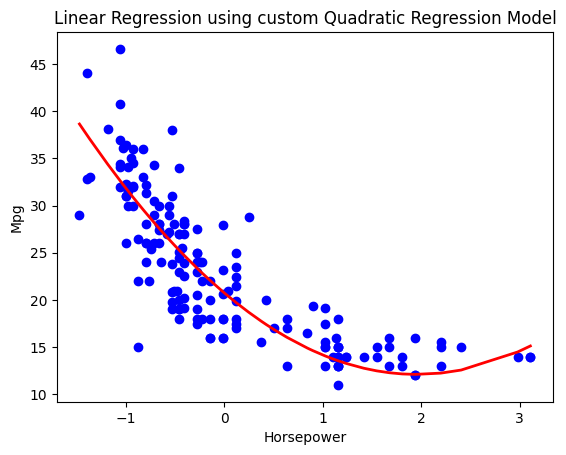

In [17]:
# Sort data
sorted_idx = x_test.flatten().argsort()
x_test_sorted = x_test[sorted_idx]
y_pred_sorted = y_pred_quadratic[sorted_idx]

# Plot
plt.figure()
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_test_sorted, y_pred_sorted, color="red", linewidth=2)
plt.xlabel("Horsepower")
plt.ylabel("Mpg")
plt.title("Linear Regression using custom Quadratic Regression Model")
plt.show()

### Verification using the sklearn library

Computing the Quadratic Regression with Scikit-Learn...

Metrics:
R squared: 0.7088289834709546
Mean Absolute Error: 3.050608642994299
Mean Square Error: 16.76349252785823
Root Mean Square Error: 4.094324428749904


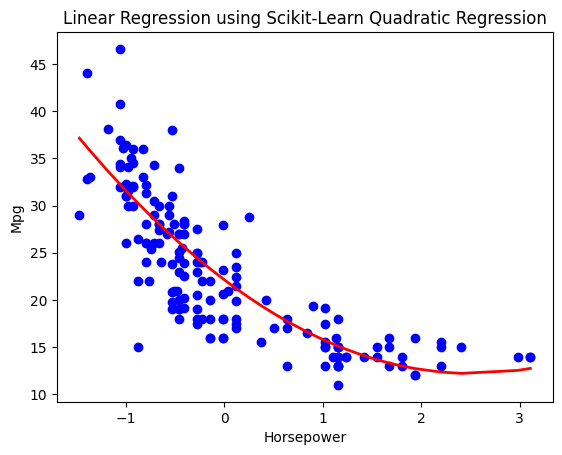

In [18]:
# Compute the quadratic model with Scikit-Learn
from sklearn.preprocessing import PolynomialFeatures

# Training the model
print("Computing the Quadratic Regression with Scikit-Learn...\n")
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y_train)

# Testing the model
y_pred_verif_quadratic = pol_reg.predict(poly_reg.fit_transform(x_test))

# Evaluating the model
print("Metrics:")
print('R squared:', metrics.r2_score(y_test, y_pred_verif_quadratic))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_verif_quadratic))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred_verif_quadratic))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_verif_quadratic)))

# Sort data
sorted_idx = x_test.flatten().argsort()
x_test_sorted = x_test[sorted_idx]
y_pred_sorted = y_pred_verif_quadratic[sorted_idx]

# Plot
plt.figure()
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_test_sorted, y_pred_sorted, color="red", linewidth=2)
plt.xlabel("Horsepower")
plt.ylabel("Mpg")
plt.title("Linear Regression using Scikit-Learn Quadratic Regression")
plt.show()


# Test of the Polynomial Degree 5 Regression class on the "Auto.csv" dataset

### Compute the optimal parameters for the Quadratic Regression model

In [19]:
# Compute optimal hyperparameters for model 1
(
    iterations_nb_degree_5,
    learning_rate_degree_5,
    results_model_degree_5,
) = computeOptimalParameters(x_train, x_test, y_train, y_test, "degree_5")


# Print results
print("Optimal hyperparameters:")
print("Iterations number:", iterations_nb_degree_5)
print("Learning rate:", learning_rate_degree_5)

Optimal hyperparameters:
Iterations number: 50000
Learning rate: 0.0001


### Compute the Polynomial Degree 5 Regression model with the optimal parameters

In [20]:
# Reshape x_train and x_test to 2D arrays
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

# Initialise the model
degree5_model = PolynomialDegree5RegressionCustomModel(learning_rate_degree_5, iterations_nb_degree_5)

# Fit the model
thetha, cost = degree5_model.fit(x_train, y_train)
print("Linear Regression Coefficients:", thetha)
print("Cost:", cost)

# Make predictions
y_pred_degree_5 = degree5_model.predict(x_test)

# Compute metrics
rSquare, meanAbErr, meanSqErr, rootMeanSqErr = degree5_model.metrics(x_test, y_test)
print("\nMetrics:")
print("R squared:", rSquare)
print("Mean absolute error:", meanAbErr)
print("Mean squared error:", meanSqErr)
print("Root mean squared error:", rootMeanSqErr) 

Linear Regression Coefficients: [21.27833027 -6.95988848  4.82335047 -0.76578868 -1.28539307  0.38082517]
Cost: 20.909648196310343

Metrics:
R squared: 0.7112229108589582
Mean absolute error: 3.1461227237419385
Mean squared error: 16.625667738978425
Root mean squared error: 4.077458490160068


### Plot the predicted values against the actual values

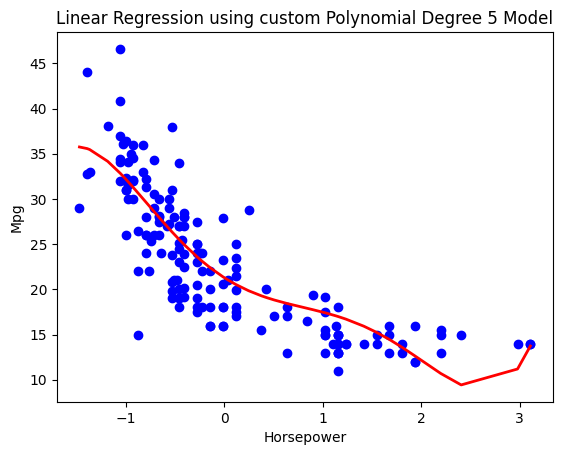

In [21]:
# Sort data
sorted_idx = x_test.flatten().argsort()
x_test_sorted = x_test[sorted_idx]
y_pred_sorted = y_pred_degree_5[sorted_idx]

# Plot
plt.figure()
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_test_sorted, y_pred_sorted, color="red", linewidth=2)
plt.xlabel("Horsepower")
plt.ylabel("Mpg")
plt.title("Linear Regression using custom Polynomial Degree 5 Model")
plt.show()

### Verification using the sklearn library

Computing the Polynomial Degree 5 Regression with Scikit-Learn...

Metrics:
R squared: 0.7125665339079456
Mean Absolute Error: 3.051456408594071
Mean Square Error: 16.548311774052873
Root Mean Square Error: 4.067961623965112


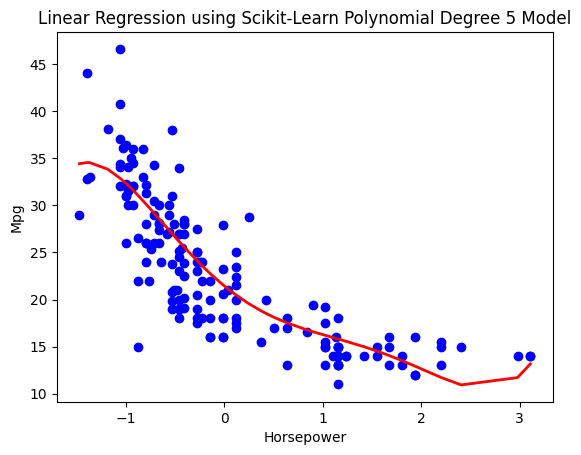

In [22]:
# Compute Polynomial Degree 5 model with Scikit-Learn
from sklearn.preprocessing import PolynomialFeatures

# Training the model
print("Computing the Polynomial Degree 5 Regression with Scikit-Learn...\n")
poly_reg = PolynomialFeatures(degree=5)
x_poly = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y_train)

# Testing the model
y_pred_verif_degree_5 = pol_reg.predict(poly_reg.fit_transform(x_test))

# Evaluating the model
print("Metrics:")
print('R squared:', metrics.r2_score(y_test, y_pred_verif_degree_5))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_verif_degree_5))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred_verif_degree_5))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_verif_degree_5)))

# Sort data
sorted_idx = x_test.flatten().argsort()
x_test_sorted = x_test[sorted_idx]
y_pred_sorted = y_pred_verif_degree_5[sorted_idx]

# Plot
plt.figure()
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_test_sorted, y_pred_sorted, color="red", linewidth=2)
plt.xlabel("Horsepower")
plt.ylabel("Mpg")
plt.title("Linear Regression using Scikit-Learn Polynomial Degree 5 Model")
plt.show()